Importing Libraries

In [3]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.stem import WordNetLemmatizer
%matplotlib inline

Loading data

In [4]:
df= pd.read_csv('Tweet_1.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


Removing pattern like "@"

In [5]:
def remove(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    
df['new_tweet'] = np.vectorize(remove)(df['tweet'], "@[\w]*")
df

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


Removing other unnecessary patterns

In [6]:
df['new_tweet'] = df['new_tweet'].str.replace("[^a-zA-Z#]", " ")

Removing short words

In [7]:
df['new_tweet'] = df['new_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap herself mantl...
31959,31960,0,listening to sad songs on a monday morning otw...,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemns


Tokenization

In [8]:
tokenized_tweet = df['new_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: new_tweet, dtype: object

Stemming

In [9]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: new_tweet, dtype: object

Joining tokenized words

In [10]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['new_tweet'] = tokenized_tweet
df

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn


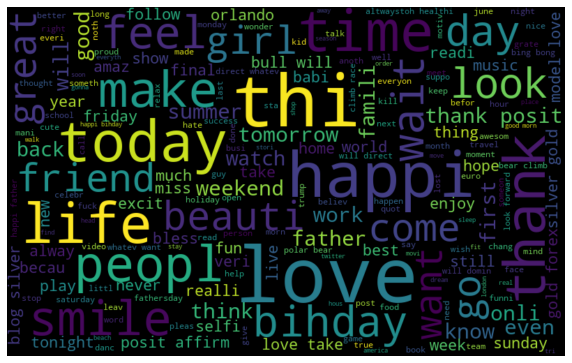

In [19]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['new_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Negative tweets Visualization

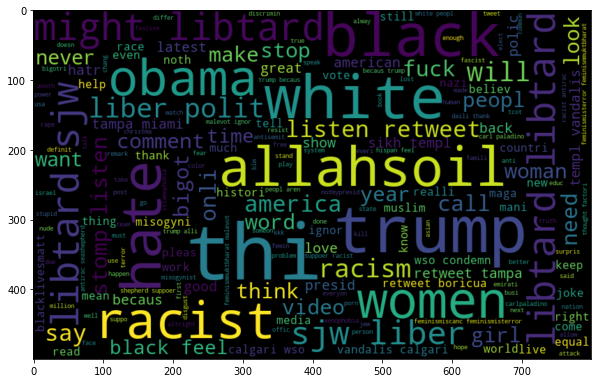

In [32]:
from wordcloud import WordCloud
negative_words = ' '.join([text for text in df['new_tweet'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(df['new_tweet'], df['label'],test_size = 0.05, random_state = 0)

In [28]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  167058


In [29]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1505
           1       0.90      0.49      0.63        94

    accuracy                           0.97      1599
   macro avg       0.94      0.74      0.81      1599
weighted avg       0.97      0.97      0.96      1599

Logistic Regression, Accuracy Score: 0.9668542839274546
